Rede Neural Densa com base de dados sobre diabetes

In [161]:
# Importando as bibliotecas necessárias
# Divide a base de dados entre treino e teste
from sklearn.model_selection import train_test_split
# Importa as funções da biblioteca keras que serão utilizadas
# Função do keras que irá criar um modelo sequencial
from keras.models import Sequential
# Função do keras que irá criar camadas densas
from keras.layers import Dense
# Importando a biblioteca pandas
import pandas as pd

A base de dados utilizada sobre diabetes contém 768 linhas e 9 colunas, sendo as 8 primeiras colunas os atributos da base e a última coluna a classe, que se refere ao fato do paciente possuir (1) ou não possuir (0) diabetes

In [162]:
# Fazendo a leitura da base de dados
df = pd.read_csv('diabetes.csv')
# Exibe a base de dados
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [163]:
# Verifica os tipos de dados das colunas da base de dados
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [164]:
# Seleciona os atributos da base de dados
X = df.iloc[:,0:8].values
# Seleciona a classe da base de dados
y = df.iloc[:,8].values

In [165]:
# Divisão da base de dados entre treinamento e teste, sendo 70% para treinamento e 30% para teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                        y,
                                                        test_size = 0.3,
                                                        random_state = 0)

In [166]:
# Cria um modelo sequencial
model = Sequential()
# Adicione três camadas densas à rede neural
model.add(Dense(units=10, activation='relu', input_dim=8)) # Camada de entrada
model.add(Dense(units=5, activation='relu')) # Camada oculta
model.add(Dense(units=1, activation='sigmoid')) # Camada de saída
# Exibe o resumo do modelo criado
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 10)                90        
                                                                 
 dense_49 (Dense)            (None, 5)                 55        
                                                                 
 dense_50 (Dense)            (None, 1)                 6         
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [167]:
# Compilação do modelo
model.compile(loss='binary_crossentropy', # Função de perda
              optimizer='adam', # Otimizador do modelo 
              metrics=['accuracy']) # Métrica para avaliação do modelo
# Treinamento do modelo com 200 épocas
result = model.fit(X_treino, y_treino, epochs=200, batch_size=64, validation_data=(X_teste, y_teste))

Epoch 1/200


9/9 [==============================] - 2s 42ms/step - loss: 8.1408 - accuracy: 0.5047 - val_loss: 5.5618 - val_accuracy: 0.5281
Epoch 2/200
9/9 [==============================] - 0s 10ms/step - loss: 6.7595 - accuracy: 0.5456 - val_loss: 5.1216 - val_accuracy: 0.5931
Epoch 3/200
9/9 [==============================] - 0s 9ms/step - loss: 6.1608 - accuracy: 0.5568 - val_loss: 4.6783 - val_accuracy: 0.5584
Epoch 4/200
9/9 [==============================] - 0s 11ms/step - loss: 5.4786 - accuracy: 0.5549 - val_loss: 4.3910 - val_accuracy: 0.5498
Epoch 5/200
9/9 [==============================] - 0s 12ms/step - loss: 5.1075 - accuracy: 0.5363 - val_loss: 4.0405 - val_accuracy: 0.5584
Epoch 6/200
9/9 [==============================] - 0s 11ms/step - loss: 4.7104 - accuracy: 0.5456 - val_loss: 3.7251 - val_accuracy: 0.5498
Epoch 7/200
9/9 [==============================] - 0s 11ms/step - loss: 4.3707 - accuracy: 0.5642 - val_loss: 3.5146 - val_accuracy: 0.5411
Epoch 8/200
9/9 [================

In [168]:
# Obtém a taxa de erro e a acurácia do modelo criado 
loss, accuracy = model.evaluate(X_teste, y_teste)

8/8 [==============================] - 0s 5ms/step - loss: 0.5966 - accuracy: 0.7100


In [169]:
# Exibe a porcentagem da acurácia do modelo
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 71.00%


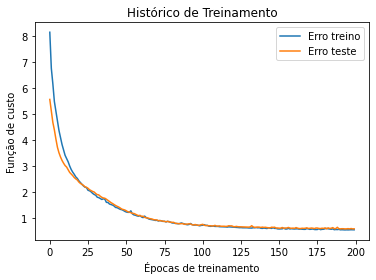

In [170]:
# Biblioteca para criação de gráficos
import matplotlib.pyplot as plt
# Cria um gráfico com a diferença entre as taxas de erro entre os dados de treino e de teste
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()